In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [34]:
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv'

df = pd.read_csv(url)

In [3]:
df.sample(5)

,date,value
327,2017-04-01,23762
126,2016-09-12,42667
180,2016-11-05,25849
1245,2019-10-06,76252
1296,2019-11-26,220590


In [4]:
df.shape

(1304, 2)

In [35]:
df2 = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]

In [6]:
df2.date.value_counts()

2016-05-19    1
2018-09-11    1
2018-09-18    1
2018-09-17    1
2018-09-16    1
             ..
2017-07-26    1
2017-07-25    1
2017-07-24    1
2017-07-23    1
2019-12-03    1
Name: date, Length: 1238, dtype: int64

### Draw 1

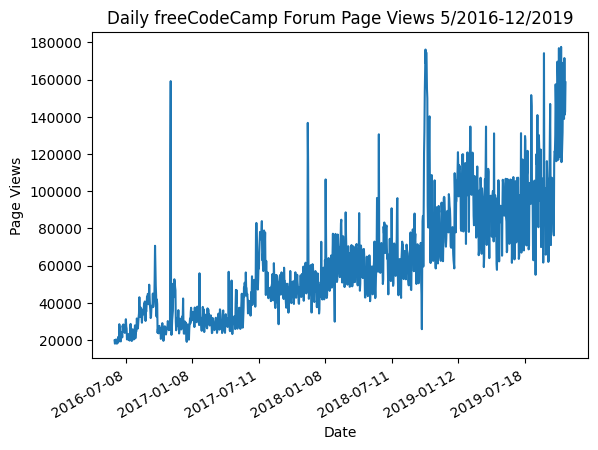

In [36]:
def draw_line_plot(x,y):
    fig, ax = plt.subplots()
    ax.plot_date(x, y, fmt='-')         
    # fig = plt.plot(x,y)
    fig.autofmt_xdate()

    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # For tickmarks and ticklabels every week
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

    # plt.grid(True)
    plt.show()


x = df2.date
y = df2.value
draw_line_plot(x,y)

### Draw 2

In [37]:
df2.date = pd.to_datetime(df2.date, format='%Y-%m-%d')
df2.dtypes

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3708\426123977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.date = pd.to_datetime(df2.date, format='%Y-%m-%d')


date     datetime64[ns]
value             int64
dtype: object

In [53]:
df2['year'] = df2.date.dt.year
df2['month'] = df2.date.dt.month_name()
df2.sample(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3708\638540796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2.date.dt.year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3708\638540796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2.date.dt.month_name()


,date,value,year,month
706,2018-04-15,50303,2018,April
60,2016-07-08,31184,2016,July
362,2017-05-06,28752,2017,May
1077,2019-04-21,75644,2019,April
1208,2019-08-30,98117,2019,August
752,2018-05-31,96378,2018,May
1194,2019-08-16,96934,2019,August
269,2017-02-02,31924,2017,February
870,2018-09-26,69501,2018,September
619,2018-01-18,64068,2018,January


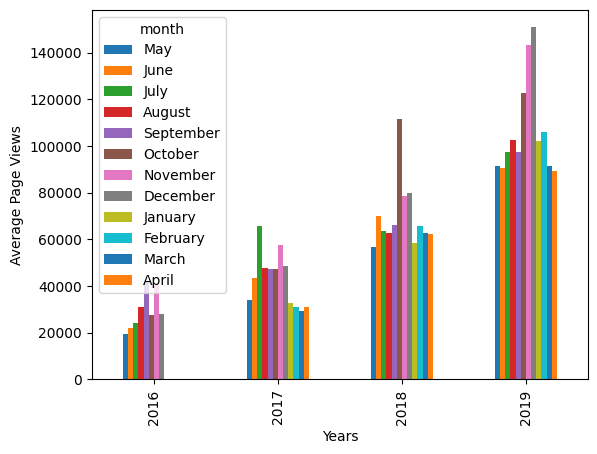

In [60]:
def draw_bar_plot():
    pivot = pd.pivot_table(
        df2, 
        index='year', 
        columns='month', 
        values='value', 
        sort=False
    )

    ax = pivot.plot(ylabel='value', kind='bar')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    

draw_bar_plot()

### Draw 3

In [63]:
df2.year = df2.year.astype(str)
df2.month = sorted(df2.month, key=lambda m: datetime.strptime(m, "%B"))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3708\2353756105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.year = df2.year.astype(str)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3708\2353756105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.month = sorted(df2.month, key=lambda m: datetime.strptime(m, "%B"))


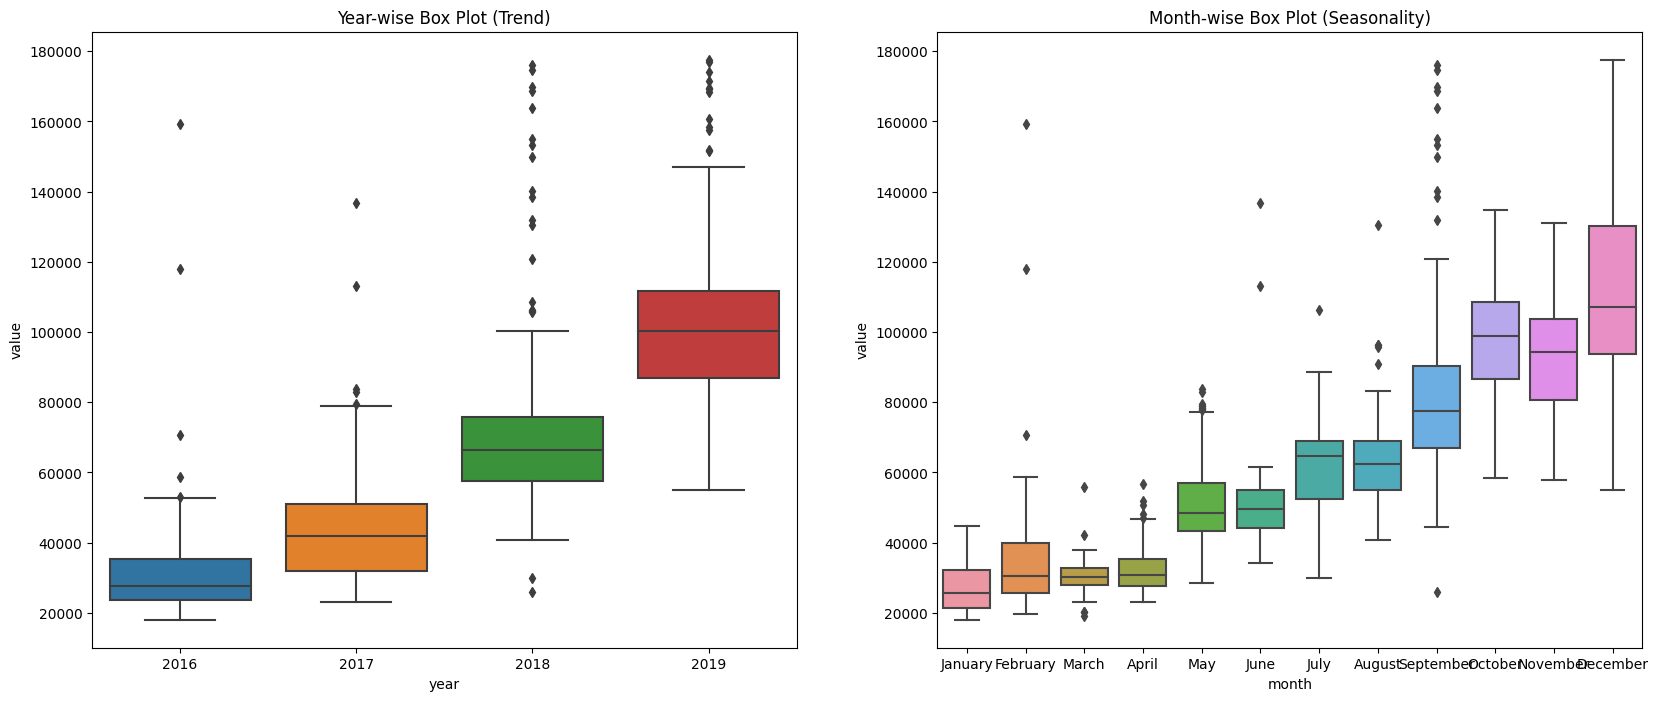

In [65]:
def draw_box_plot():
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    # Bulbasaur
    sns.boxplot(ax=axes[0], x=df2.year , y=df2.value)
    axes[0].set_title('Year-wise Box Plot (Trend)')

    # Charmander
    sns.boxplot(ax=axes[1], x=df2.month, y=df2.value)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')

draw_box_plot()


In [ ]:
# sorted(df2.month, key=lambda m: datetime.strptime(m, "%B"))
df2['month'] = pd.Categorical(df['month'], categories=month, ordered=True)